## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap FIN scan (sneaky)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [4]:
directory = '/home/USER/notebooks/pcaps/nmap_fin_scan_sneaky'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    16484.359516
Name: time, dtype: float64

In [6]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    16484.359516
1    16484.275492
2    16484.095824
3    16484.299457
4    16484.330106
5    16484.248044
6    16484.218123
7    16484.091086
8    16484.006952
9    16484.350755
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    16484.227535
dtype: float64

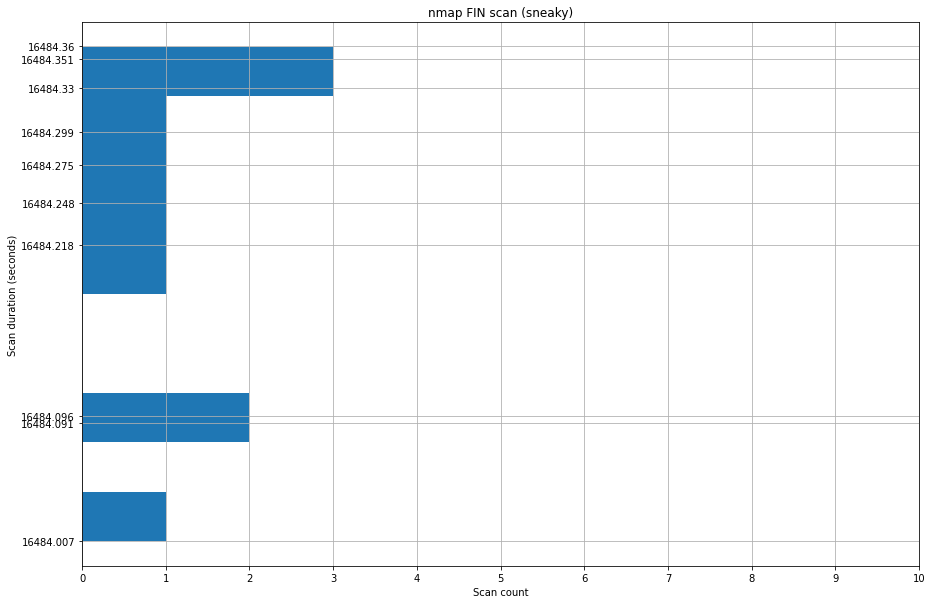

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

,0
count,10.000000
mean,16484.227535
std,0.122804
min,16484.006952
25%,16484.126399
50%,16484.261768
75%,16484.322444
max,16484.359516


## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1.3333958144362308



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 39229 993
2 39229 143
3 39229 5900
4 39229 199
5 39229 8888
6 39229 22
7 39229 995
8 39229 554
9 39229 443
10 39229 21
11 39234 993
12 39229 1723
13 39229 139
14 39229 80
15 39229 8080
16 39229 3306
17 39229 1025
18 39229 445
19 39229 256
20 39229 25
21 39229 1720
22 39236 993
23 39229 111
24 39229 587
25 39229 135
26 39229 53
27 39229 23
28 39229 113
29 39229 110
30 39229 3389
31 39229 17988
32 39229 19
33 39238 993
34 39229 458
35 39229 7496
36 39229 2608
37 39229 16012
38 39229 50000
39 39229 2200
40 39229 2034
41 39229 9081
42 39229 3737
43 39229 7921
44 39240 993
45 39229 5050
46 39229 4224
47 39229 2049
48 39229 10180
49 39229 21571
50 39229 7911
51 39229 6881
52 39229 801
53 39229 6156
54 39229 30718
55 39242 993
56 39229 9900
57 39229 691
58 39229 5902
59 39229 57797
60 39229 42510
61 39229 1594
62 39229 5859
63 39229 1503
64 39229 3013
65 39229 19315
66 39244 993
67 39229 1076
68 39229 9877
69 39229 19283
70 39229 749
71 39229 1060
72 39229 9968
73 39229 11967
74 39229 5001


593 39229 1028
594 39340 993
595 39229 2718
596 39229 5850
597 39229 32771
598 39229 4446
599 39229 49156
600 39229 1272
601 39229 8194
602 39229 3689
603 39229 9010
604 39229 1148
605 39342 993
606 39229 1812
607 39229 2251
608 39229 5950
609 39229 1072
610 39229 1036
611 39229 8181
612 39229 4000
613 39229 3052
614 39229 65000
615 39229 84
616 39344 993
617 39229 18988
618 39229 2366
619 39229 301
620 39229 1151
621 39229 9090
622 39229 38292
623 39229 2068
624 39229 2008
625 39229 6129
626 39229 9009
627 39346 993
628 39229 50500
629 39229 700
630 39229 65389
631 39229 49
632 39229 48080
633 39229 32777
634 39229 49161
635 39229 5730
636 39229 406
637 39229 2106
638 39348 993
639 39229 2809
640 39229 5214
641 39229 15003
642 39229 720
643 39229 2010
644 39229 2301
645 39229 49176
646 39229 1687
647 39229 5030
648 39229 12174
649 39350 993
650 39229 783
651 39229 3000
652 39229 787
653 39229 79
654 39229 3971
655 39229 16080
656 39229 5815
657 39229 6346
658 39229 1296
659 39229 1064

343 37826 8652
344 37826 3703
345 37826 10180
346 37826 1201
347 37826 4899
348 37826 3371
349 37826 514
350 37826 22939
351 37826 16000
352 37893 53
353 37826 1066
354 37826 11110
355 37826 2170
356 37826 1999
357 37826 9877
358 37826 3370
359 37826 15742
360 37826 259
361 37826 3905
362 37826 5080
363 37895 53
364 37826 6547
365 37826 5298
366 37826 8222
367 37826 7625
368 37826 2910
369 37826 2383
370 37826 9220
371 37826 1122
372 37826 3826
373 37826 21571
374 37897 53
375 37826 1064
376 37826 1081
377 37826 280
378 37826 34573
379 37826 8009
380 37826 1076
381 37826 27715
382 37826 7201
383 37826 2288
384 37826 8001
385 37899 53
386 37826 6002
387 37826 1023
388 37826 50001
389 37826 4998
390 37826 1236
391 37826 32785
392 37826 500
393 37826 9917
394 37826 1755
395 37826 1147
396 37901 53
397 37826 1068
398 37826 32773
399 37826 3031
400 37826 40911
401 37826 5009
402 37826 15003
403 37826 1034
404 37826 5910
405 37826 10628
406 37826 1062
407 37903 53
408 37826 8088
409 37826 10

1009 37826 705
1010 37826 32782
1011 37826 2179
1012 38013 53
1013 37826 2399
1014 37826 32770
1015 37826 1093
1016 37826 8290
1017 37826 1065
1018 37826 31038
1019 37826 366
1020 37826 6123
1021 37826 1029
1022 37826 1036
1023 38015 53
1024 37826 646
1025 37826 5500
1026 37826 4449
1027 37826 5225
1028 37826 85
1029 37826 563
1030 37826 5120
1031 37826 4126
1032 37826 1216
1033 37826 2260
1034 38017 53
1035 37826 625
1036 37826 19801
1037 37826 1130
1038 37826 2607
1039 37826 44442
1040 37826 1095
1041 37826 5555
1042 37826 1533
1043 37826 44443
1044 37826 1069
1045 38019 53
1046 37826 8200
1047 37826 8193
1048 37826 2111
1049 37826 1113
1050 37826 1079
1051 37826 25734
1052 37826 5903
1053 37826 56738
1054 37826 3000
1055 37826 340
1056 38021 53
1057 37826 42
1058 37826 3017
1059 37826 2013
1060 37826 109
1061 37826 7106
1062 37826 50006
1063 37826 49
1064 37826 8180
1065 37826 2967
1066 37826 4567
1067 38023 53
1068 37826 1100
1069 37826 179
1070 37826 50300
1071 37826 3986
1072 378

743 50853 3333
744 50853 3766
745 50853 30000
746 50853 222
747 50853 3801
748 50992 143
749 50853 6502
750 50853 1078
751 50853 5811
752 50853 13456
753 50853 9877
754 50853 3390
755 50853 524
756 50853 25734
757 50853 8200
758 50853 17988
759 50994 143
760 50853 5904
761 50853 54045
762 50853 1070
763 50853 1501
764 50853 5102
765 50853 3301
766 50853 8443
767 50853 1971
768 50853 41511
769 50853 1037
770 50996 143
771 50853 3871
772 50853 808
773 50853 3986
774 50853 1089
775 50853 9575
776 50853 9415
777 50853 4662
778 50853 987
779 50853 22939
780 50853 5221
781 50998 143
782 50853 90
783 50853 6123
784 50853 6156
785 50853 125
786 50853 3905
787 50853 1296
788 50853 63331
789 50853 1666
790 50853 646
791 50853 82
792 51000 143
793 50853 6059
794 50853 14441
795 50853 3168
796 50853 1213
797 50853 16080
798 50853 20005
799 50853 465
800 50853 3007
801 50853 5800
802 50853 1040
803 51002 143
804 50853 616
805 50853 1494
806 50853 10025
807 50853 3324
808 50853 4111
809 50853 9502
8

310 58586 406
311 58586 5054
312 58586 49400
313 58586 9090
314 58586 2068
315 58586 9220
316 58586 2910
317 58586 3324
318 58586 1248
319 58647 22
320 58586 1164
321 58586 4045
322 58586 19350
323 58586 7741
324 58586 24800
325 58586 2602
326 58586 61900
327 58586 1234
328 58586 5825
329 58586 2038
330 58649 22
331 58586 843
332 58586 10180
333 58586 9
334 58586 3325
335 58586 9943
336 58586 51493
337 58586 5666
338 58586 548
339 58586 19101
340 58586 563
341 58651 22
342 58586 6646
343 58586 20005
344 58586 32778
345 58586 12345
346 58586 3001
347 58586 9535
348 58586 2383
349 58586 2288
350 58586 5221
351 58586 1049
352 58653 22
353 58586 6106
354 58586 32776
355 58586 5678
356 58586 3372
357 58586 32784
358 58586 8383
359 58586 3261
360 58586 683
361 58586 1310
362 58586 787
363 58655 22
364 58586 1072
365 58586 32773
366 58586 16001
367 58586 1149
368 58586 15742
369 58586 35500
370 58586 43
371 58586 1138
372 58586 34572
373 58586 2121
374 58657 22
375 58586 4662
376 58586 65000


44 39268 80
45 39257 6007
46 39257 57797
47 39257 13
48 39257 4006
49 39257 4126
50 39257 49152
51 39257 1113
52 39257 5950
53 39257 19283
54 39257 3914
55 39270 80
56 39257 2008
57 39257 61532
58 39257 4224
59 39257 1148
60 39257 1040
61 39257 9418
62 39257 3322
63 39257 2710
64 39257 2107
65 39257 3372
66 39272 80
67 39257 5054
68 39257 464
69 39257 2809
70 39257 27356
71 39257 1117
72 39257 9080
73 39257 26
74 39257 9081
75 39257 19350
76 39257 8021
77 39274 80
78 39257 2034
79 39257 2033
80 39257 3211
81 39257 6779
82 39257 15003
83 39257 16016
84 39257 49167
85 39257 5214
86 39257 27353
87 39257 2301
88 39276 80
89 39257 5915
90 39257 1594
91 39257 1057
92 39257 8800
93 39257 1047
94 39257 1201
95 39257 5004
96 39257 1066
97 39257 6646
98 39257 903
99 39278 80
100 39257 9943
101 39257 714
102 39257 8083
103 39257 9099
104 39257 2126
105 39257 3300
106 39257 255
107 39257 16012
108 39257 3260
109 39257 5825
110 39280 80
111 39257 7443
112 39257 2047
113 39257 60020
114 39257 20000


810 39257 7
811 39257 9898
812 39257 1081
813 39257 8022
814 39408 80
815 39257 32772
816 39257 3889
817 39257 2068
818 39257 1076
819 39257 1061
820 39257 1322
821 39257 1131
822 39257 12345
823 39257 2401
824 39257 3325
825 39410 80
826 39257 5009
827 39257 16001
828 39257 6112
829 39257 9101
830 39257 9968
831 39257 2393
832 39257 51103
833 39257 1098
834 39257 1812
835 39257 700
836 39412 80
837 39257 84
838 39257 8007
839 39257 5226
840 39257 2602
841 39257 8180
842 39257 9110
843 39257 2013
844 39257 10003
845 39257 9207
846 39257 100
847 39414 80
848 39257 52869
849 39257 12174
850 39257 8088
851 39257 1658
852 39257 992
853 39257 6667
854 39257 49153
855 39257 6668
856 39257 3367
857 39257 38292
858 39416 80
859 39257 544
860 39257 4443
861 39257 636
862 39257 1058
863 39257 1974
864 39257 1998
865 39257 912
866 39257 1328
867 39257 1244
868 39257 1839
869 39418 80
870 39257 2725
871 39257 301
872 39257 5544
873 39257 51493
874 39257 5903
875 39257 2065
876 39257 65000
877 3925

277 62523 3260
278 62523 144
279 62523 9877
280 62523 2135
281 62523 54328
282 62523 1117
283 62523 4899
284 62523 9101
285 62523 1839
286 62578 256
287 62523 1053
288 62523 700
289 62523 5988
290 62523 44443
291 62523 13722
292 62523 44442
293 62523 1688
294 62523 6839
295 62523 4129
296 62523 2196
297 62580 256
298 62523 7007
299 62523 1043
300 62523 3945
301 62523 1
302 62523 32772
303 62523 7921
304 62523 8082
305 62523 5925
306 62523 880
307 62523 2144
308 62582 256
309 62523 5414
310 62523 2702
311 62523 58080
312 62523 3017
313 62523 4449
314 62523 9929
315 62523 6009
316 62523 37
317 62523 62078
318 62523 3971
319 62584 256
320 62523 8090
321 62523 425
322 62523 49153
323 62523 1052
324 62523 4567
325 62523 32783
326 62523 9003
327 62523 211
328 62523 49159
329 62523 625
330 62586 256
331 62523 5033
332 62523 32777
333 62523 5822
334 62523 9290
335 62523 49156
336 62523 9900
337 62523 1031
338 62523 3333
339 62523 3323
340 62523 1080
341 62588 256
342 62523 1310
343 62523 1328


943 62523 9618
944 62523 1580
945 62523 301
946 62698 256
947 62523 10621
948 62523 15660
949 62523 7025
950 62523 1974
951 62523 7778
952 62523 1124
953 62523 3370
954 62523 1248
955 62523 6580
956 62523 912
957 62700 256
958 62523 1028
959 62523 3914
960 62523 90
961 62523 10629
962 62523 55555
963 62523 900
964 62523 5221
965 62523 1098
966 62523 5950
967 62523 9080
968 62702 256
969 62523 1434
970 62523 2170
971 62523 1183
972 62523 3766
973 62523 3390
974 62523 1151
975 62523 17988
976 62523 8089
977 62523 52848
978 62523 32778
979 62704 256
980 62523 3372
981 62523 13
982 62523 43
983 62523 8180
984 62523 163
985 62523 10009
986 62523 2013
987 62523 8200
988 62523 1805
989 62523 32769
990 62706 256
991 62523 8085
992 62523 667
993 62523 70
994 62523 3325
995 62523 5060
996 62523 5801
997 62523 20222
998 62523 1174
999 62523 15002
1000 62523 8045
1001 62708 256
1002 62523 1081
1003 62523 9898
1004 62523 1311
1005 62523 1057
1006 62523 8083
1007 62523 1277
1008 62523 3828
1009 6252

677 41336 32777
678 41336 5101
679 41336 9103
680 41336 32780
681 41336 10001
682 41463 8080
683 41336 6689
684 41336 1058
685 41336 43
686 41336 2007
687 41336 8099
688 41336 1079
689 41336 1067
690 41336 2048
691 41336 749
692 41336 1042
693 41465 8080
694 41336 5030
695 41336 56737
696 41336 1183
697 41336 8089
698 41336 16113
699 41336 1805
700 41336 497
701 41336 49153
702 41336 9010
703 41336 500
704 41467 8080
705 41336 2301
706 41336 3784
707 41336 280
708 41336 8192
709 41336 1875
710 41336 15742
711 41336 1840
712 41336 9666
713 41336 1185
714 41336 545
715 41469 8080
716 41336 2909
717 41336 3007
718 41336 513
719 41336 3809
720 41336 3814
721 41336 2049
722 41336 1247
723 41336 1060
724 41336 99
725 41336 1455
726 41471 8080
727 41336 3766
728 41336 5560
729 41336 9500
730 41336 1027
731 41336 9101
732 41336 5718
733 41336 81
734 41336 6123
735 41336 5269
736 41336 5989
737 41473 8080
738 41336 13
739 41336 873
740 41336 2170
741 41336 62078
742 41336 5061
743 41336 5877
74

358 51458 2492
359 51458 1141
360 51458 1090
361 51458 6543
362 51458 5500
363 51527 587
364 51458 4343
365 51458 5811
366 51458 7004
367 51458 1169
368 51458 5825
369 51458 1151
370 51458 5405
371 51458 7920
372 51458 5560
373 51458 1503
374 51529 587
375 51458 513
376 51458 1055
377 51458 10621
378 51458 1583
379 51458 34573
380 51458 3367
381 51458 2967
382 51458 1984
383 51458 5003
384 51458 1138
385 51531 587
386 51458 49165
387 51458 3333
388 51458 3128
389 51458 1106
390 51458 9010
391 51458 4321
392 51458 2638
393 51458 912
394 51458 2048
395 51458 5102
396 51533 587
397 51458 3828
398 51458 2196
399 51458 9898
400 51458 3995
401 51458 6
402 51458 2020
403 51458 65000
404 51458 1113
405 51458 999
406 51458 54328
407 51535 587
408 51458 543
409 51458 720
410 51458 50500
411 51458 9099
412 51458 10617
413 51458 9500
414 51458 15002
415 51458 2033
416 51458 2001
417 51458 3005
418 51537 587
419 51458 636
420 51458 1011
421 51458 5902
422 51458 34571
423 51458 1533
424 51458 2007
4

911 51458 8300
912 51458 749
913 51627 587
914 51458 1044
915 51458 3889
916 51458 407
917 51458 1034
918 51458 5222
919 51458 10003
920 51458 1110
921 51458 7627
922 51458 8994
923 51458 9876
924 51629 587
925 51458 5004
926 51458 50389
927 51458 19
928 51458 9071
929 51458 65389
930 51458 1046
931 51458 63331
932 51458 50003
933 51458 427
934 51458 8181
935 51631 587
936 51458 5000
937 51458 6004
938 51458 45100
939 51458 1185
940 51458 8899
941 51458 1098
942 51458 1721
943 51458 49176
944 51458 4444
945 51458 10243
946 51633 587
947 51458 1935
948 51458 2161
949 51458 1433
950 51458 1107
951 51458 109
952 51458 211
953 51458 6779
954 51458 49156
955 51458 6101
956 51458 787
957 51635 587
958 51458 4045
959 51458 99
960 51458 8652
961 51458 7001
962 51458 32773
963 51458 5510
964 51458 1666
965 51458 1216
966 51458 5226
967 51458 5815
968 51637 587
969 51458 79
970 51458 9001
971 51458 4445
972 51458 1600
973 51458 1461
974 51458 7007
975 51458 667
976 51458 1079
977 51458 3077
978 

478 36314 6006
479 36314 3546
480 36314 14000
481 36314 5679
482 36314 48080
483 36314 6646
484 36405 1723
485 36314 900
486 36314 1107
487 36314 3880
488 36314 8649
489 36314 1185
490 36314 8194
491 36314 3001
492 36314 49161
493 36314 1556
494 36314 9998
495 36407 1723
496 36314 10004
497 36314 49156
498 36314 9418
499 36314 6692
500 36314 5962
501 36314 30951
502 36314 7070
503 36314 8000
504 36314 3703
505 36314 2393
506 36409 1723
507 36314 1087
508 36314 9091
509 36314 5859
510 36314 3851
511 36314 1002
512 36314 1096
513 36314 19
514 36314 32776
515 36314 32782
516 36314 6059
517 36411 1723
518 36314 4045
519 36314 144
520 36314 65000
521 36314 15000
522 36314 9090
523 36314 2033
524 36314 3826
525 36314 32784
526 36314 1984
527 36314 3659
528 36413 1723
529 36314 8290
530 36314 1972
531 36314 1163
532 36314 5999
533 36314 1310
534 36314 20000
535 36314 2034
536 36314 5959
537 36314 617
538 36314 2119
539 36415 1723
540 36314 10009
541 36314 10012
542 36314 1217
543 36314 33354


212 61254 30718
213 61254 49176
214 61254 2875
215 61254 6025
216 61254 10617
217 61254 60443
218 61254 749
219 61254 56738
220 61297 53
221 61254 9110
222 61254 425
223 61254 3005
224 61254 7402
225 61254 616
226 61254 4900
227 61254 1088
228 61254 1048
229 61254 9500
230 61254 1141
231 61299 53
232 61254 1641
233 61254 3476
234 61254 1148
235 61254 5850
236 61254 22939
237 61254 8292
238 61254 2399
239 61254 1999
240 61254 999
241 61254 259
242 61301 53
243 61254 6689
244 61254 7106
245 61254 2191
246 61254 1089
247 61254 2038
248 61254 49400
249 61254 32783
250 61254 61532
251 61254 912
252 61254 5226
253 61303 53
254 61254 722
255 61254 1122
256 61254 32775
257 61254 3367
258 61254 3971
259 61254 6123
260 61254 8600
261 61254 5862
262 61254 8300
263 61254 9220
264 61305 53
265 61254 8000
266 61254 2920
267 61254 2004
268 61254 1600
269 61254 8651
270 61254 18040
271 61254 49153
272 61254 99
273 61254 1057
274 61254 3851
275 61307 53
276 61254 1301
277 61254 6129
278 61254 1041
279 

878 61254 13456
879 61254 6059
880 61417 53
881 61254 5001
882 61254 5298
883 61254 8194
884 61254 32785
885 61254 16001
886 61254 5002
887 61254 42
888 61254 20828
889 61254 15660
890 61254 32
891 61419 53
892 61254 901
893 61254 548
894 61254 9003
895 61254 50389
896 61254 1296
897 61254 5500
898 61254 1027
899 61254 7001
900 61254 64680
901 61254 1053
902 61421 53
903 61254 8333
904 61254 9009
905 61254 33
906 61254 5440
907 61254 8010
908 61254 7103
909 61254 1104
910 61254 1044
911 61254 1076
912 61254 1863
913 61423 53
914 61254 5405
915 61254 1461
916 61254 6000
917 61254 2043
918 61254 2968
919 61254 8254
920 61254 888
921 61254 27356
922 61254 49
923 61254 4449
924 61425 53
925 61254 54045
926 61254 9099
927 61254 987
928 61254 27000
929 61254 3920
930 61254 52822
931 61254 5960
932 61254 700
933 61254 1199
934 61254 646
935 61427 53
936 61254 254
937 61254 20222
938 61254 6779
939 61254 6
940 61254 3001
941 61254 16993
942 61254 3869
943 61254 2222
944 61254 416
945 61254 70


In [16]:
orders_port

,scannr,sport,dport
0,1,39229,993
1,2,39229,143
2,3,39229,5900
3,4,39229,199
4,5,39229,8888
...,...,...,...
10985,1095,61254,3052
10986,1096,61254,1099
10987,1097,61254,9418
10988,1098,61254,2710


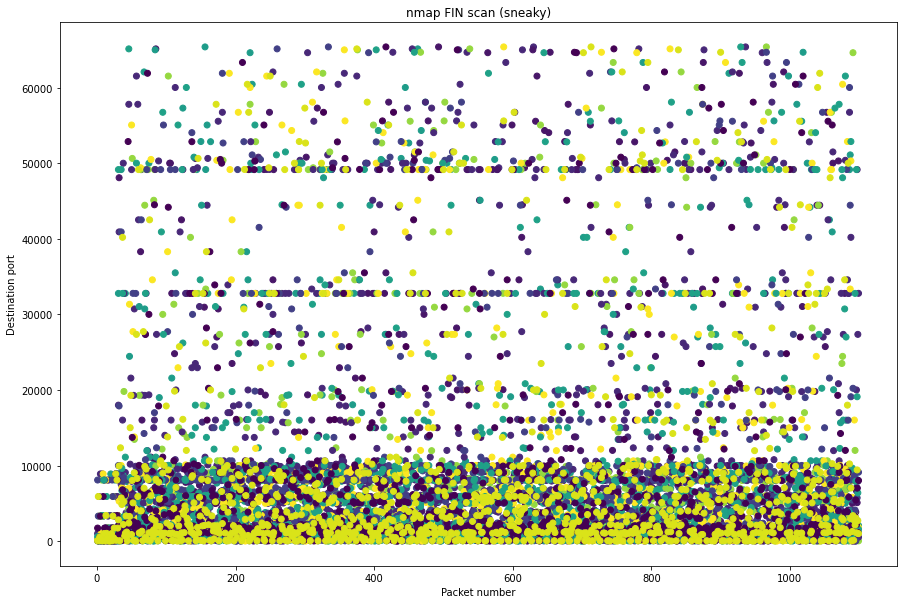

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

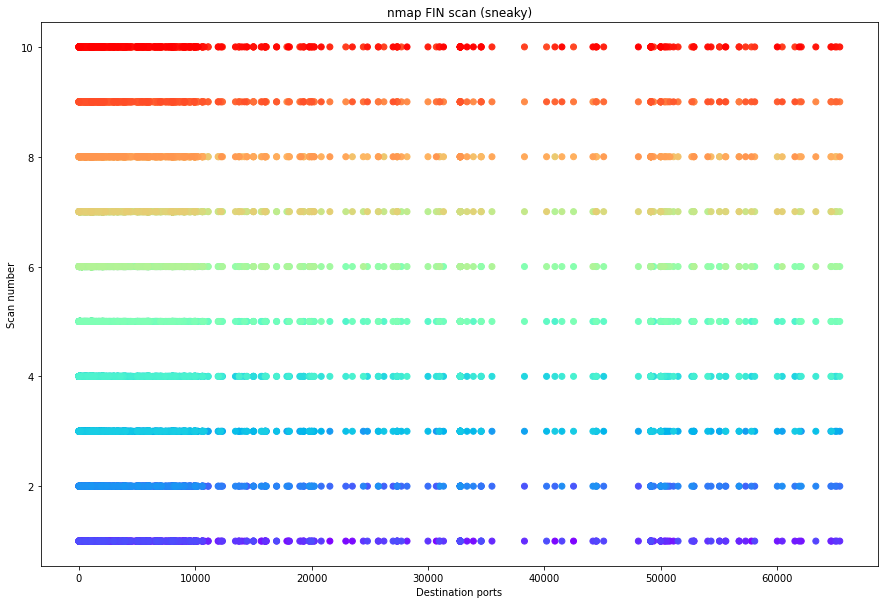

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [21]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

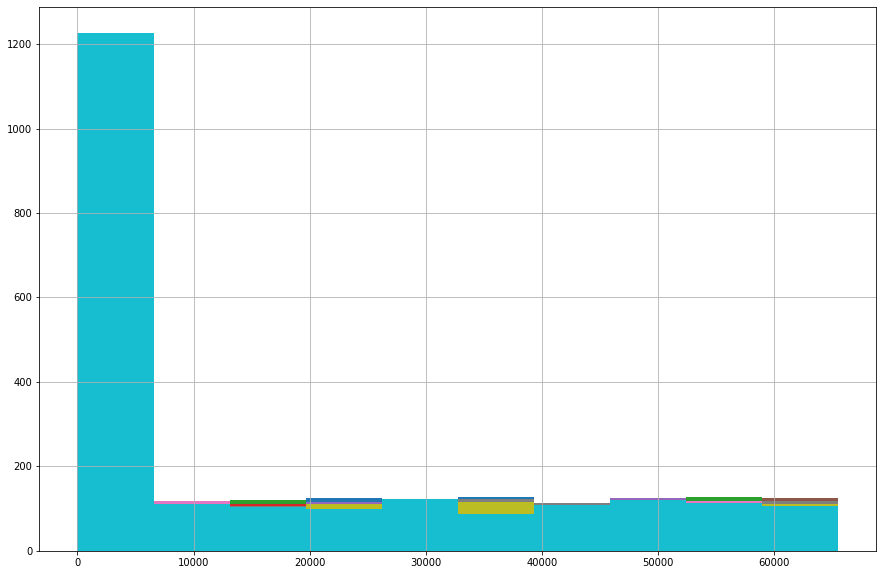

In [22]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

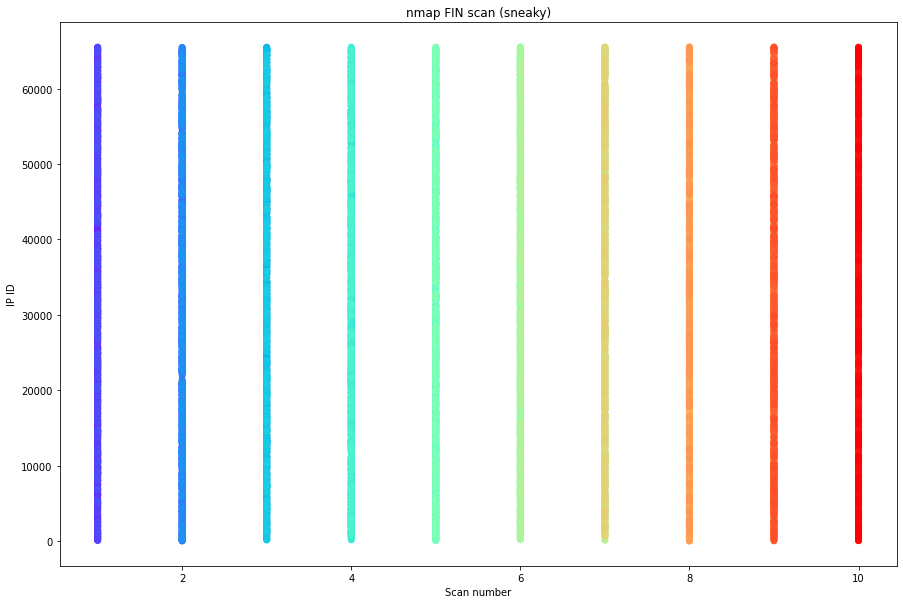

In [23]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

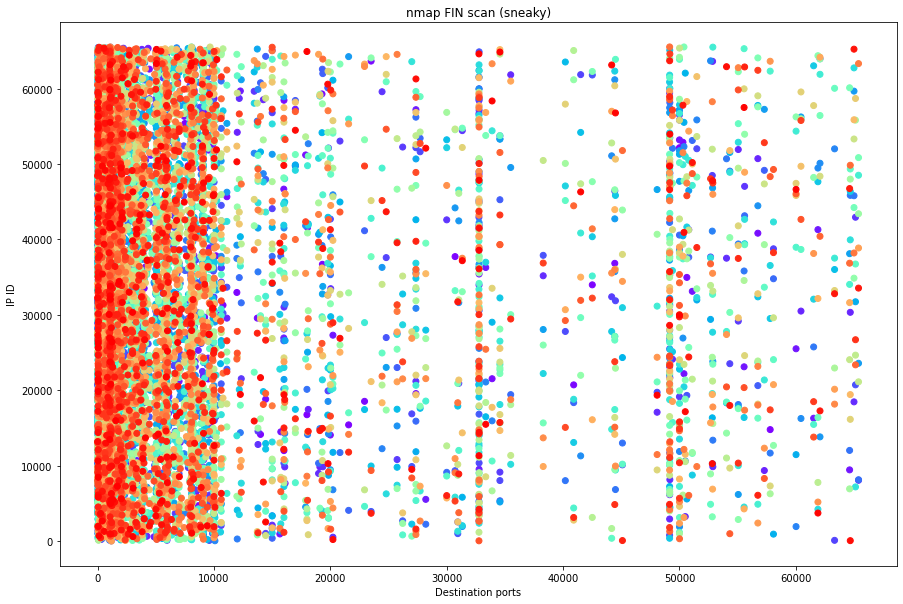

In [24]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

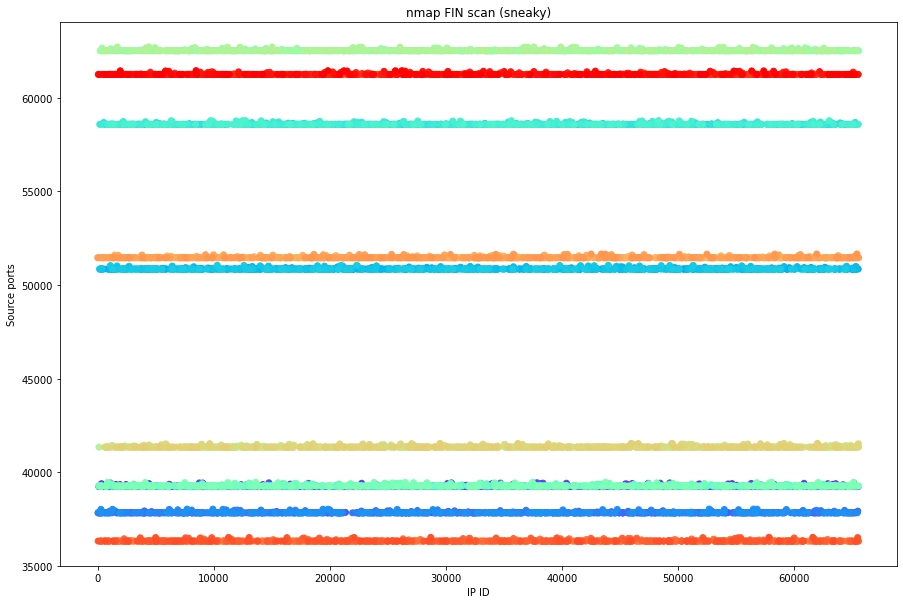

In [25]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 621158436
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 621027366
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 621420584
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
S

Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 629809320
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 629678250
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 630071468
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
Sequence number: 620961825
S

Sequence number: 2293723706
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293330492
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293461566
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2290971136
Sequence number: 2293002785
Sequence number: 229

Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2296083030
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2295689816
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2295820890
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 2293002785
Sequence number: 229

Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029157542
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029026468
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1028895394
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 102

Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1027322570
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1027191496
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1027060422
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 102

Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1038201360
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1033876078
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1033745004
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 1029616303
Sequence number: 102

Sequence number: 3666999785
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3667130859
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3667261933
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3667393007
Sequence number: 3670079928
Sequence number: 367

Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3664640277
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3664771351
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3664902409
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 3670079928
Sequence number: 367

Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1976675327
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1974446977
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1974315907
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 197

Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1970645851
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1970514781
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1970383711
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 1978575808
Sequence number: 197

Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2584919931
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2584788857
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2584657767
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 258

Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2595667935
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2595536861
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 2595405787
Sequence number: 2587869014
Sequence number: 2587869014
Sequence number: 258

Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1291794434
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1291401220
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1291532294
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 129

Sequence number: 1290024985
Sequence number: 1284585580
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1284716654
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1285372000
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1290024985
Sequence number: 1285503074
Sequence number: 129

Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096703648
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096572578
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096441508
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 409

Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4098145482
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4098014412
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4097883342
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 409

Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4103650326
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4108762216
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 4108631146
Sequence number: 4096244905
Sequence number: 4096244905
Sequence number: 409

Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2908632254
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2908501180
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2908370106
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 290

Sequence number: 2903454959
Sequence number: 2913219652
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2913088578
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2912957504
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2903454959
Sequence number: 2914923614
Sequence number: 290

Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879563338
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2883364404
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2883495478
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 287

Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2869208812
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2869339886
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2868946664
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 2879235701
Sequence number: 287

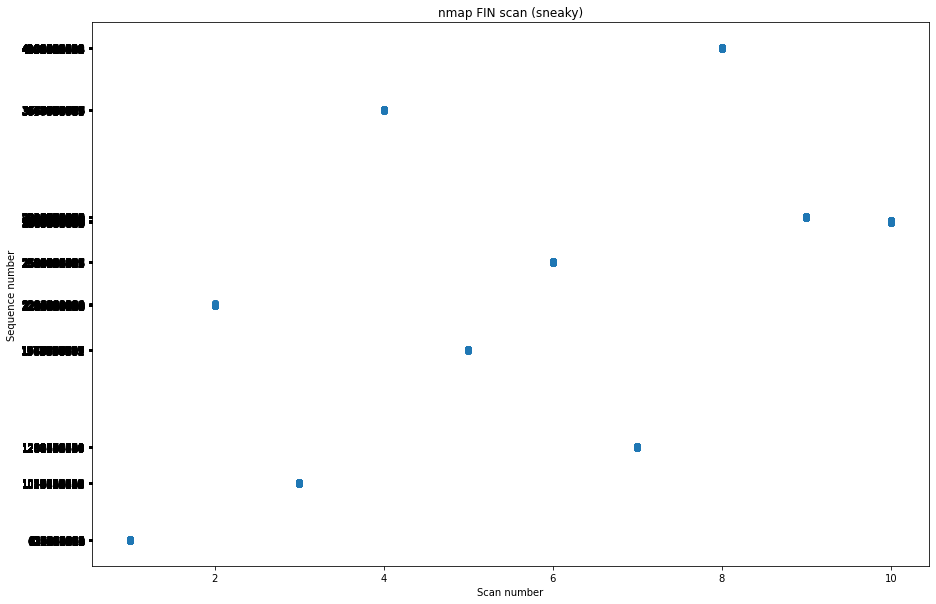

In [29]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences
plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

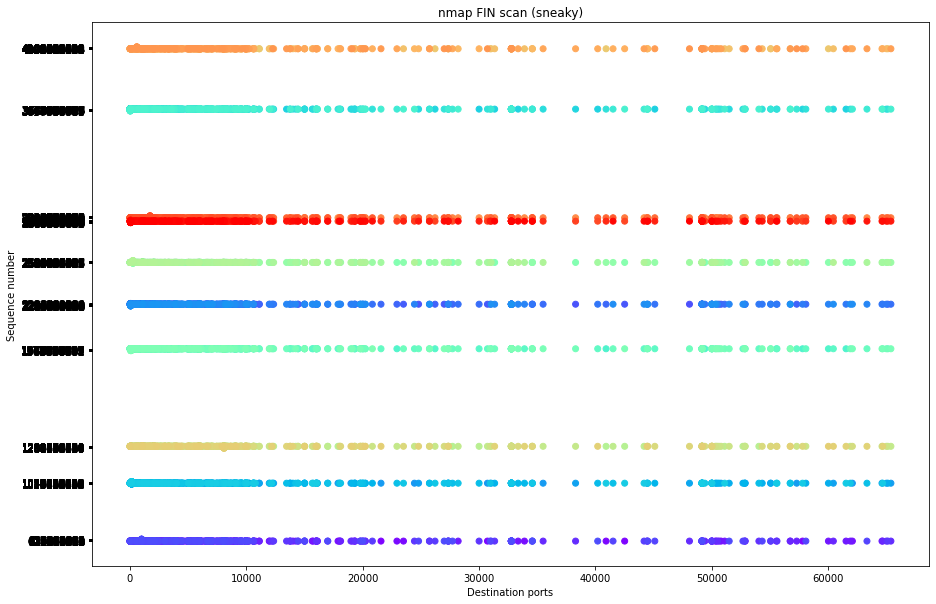

In [30]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

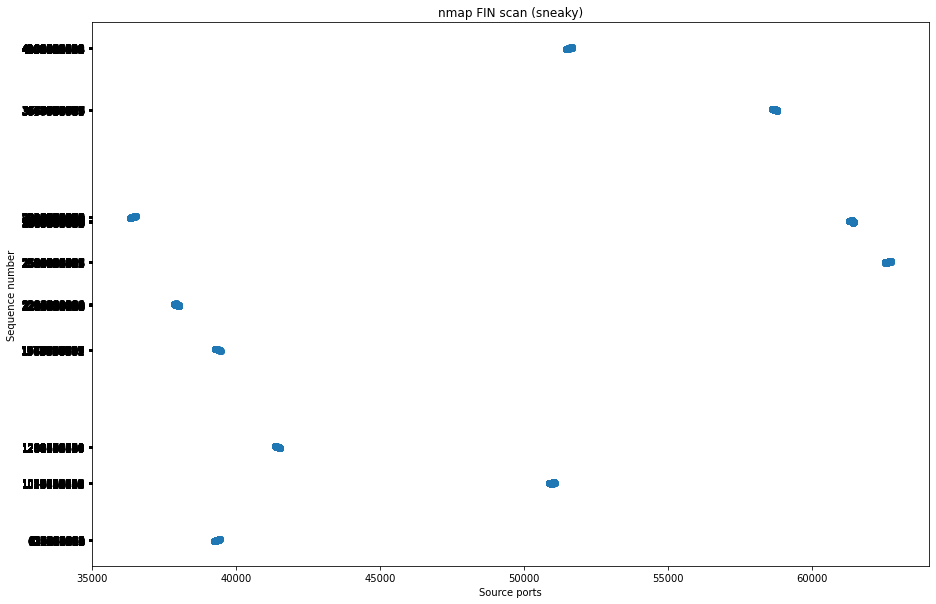

In [31]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()

In [32]:
len(set(orders_port['sport']))

915

In [33]:
orders_port['sport'].value_counts()[:30]

39229    1000
39257    1000
61254    1000
58586    1000
50853    1000
51458    1000
62523    1000
36314    1000
37826    1000
41336    1000
39374       2
39368       2
39370       2
39372       2
39382       2
39376       2
39378       2
39380       2
39364       2
39366       2
39354       2
39362       2
39360       2
39358       2
39356       2
39386       2
39352       2
39350       2
39348       2
39346       2
Name: sport, dtype: int64

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F